In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

import warnings
warnings.filterwarnings("ignore")

In [62]:
data = pd.read_csv('SEntFiN.csv')
print(len(data))
decisions = data['Decisions']
decisions_dicts = [ast.literal_eval(decision) for decision in decisions]

10753


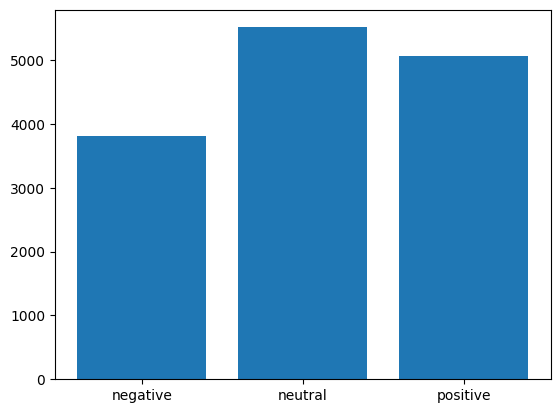

In [60]:
plt.bar(np.unique(values, return_counts=True)[0], np.unique(values, return_counts=True)[1])
plt.show()

In [ ]:
from rapidfuzz import process, fuzz

def fuzzy_replace(headline, target_entity, threshold=35):
    headline = headline.lower()
    target_entity = target_entity.lower()
    words = headline.split()
    best_match = process.extractOne(target_entity, words, scorer=fuzz.partial_ratio)
    if best_match and best_match[1] >= threshold:
        matched_word = best_match[0]
        return headline.replace(matched_word, "[TGT]")
    return headline

In [ ]:
from optimum.onnxruntime import ORTModelForSequenceClassification
from transformers import AutoTokenizer

onnx_model = ORTModelForSequenceClassification.from_pretrained("onnx/")
tokenizer = AutoTokenizer.from_pretrained("onnx/")

text = "TSLA stocks dropped 42% while SMSN rallied."
entity = "Sensex"
text = fuzzy_replace(text, entity)
inputs = tokenizer(text, return_tensors="pt", truncation=False, padding=True)

outputs = onnx_model(**inputs)
predicted_class = int(outputs.logits.argmax())
print(f"Predicted Sentiment: {predicted_class}")